In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# pip install tensorflow ignore if already installed

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [9]:
df = pd.read_csv("Churn_Modelling.csv")

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# 2. Distinguish the feature and target set
X = df.iloc[:, 3:13]   # Features (from CreditScore to EstimatedSalary)
y = df.iloc[:, 13]     # Target (Exited column)

In [12]:
labelencoder_gender = LabelEncoder()
X['Gender'] = labelencoder_gender.fit_transform(X['Gender'])


# One-hot encode Geography
X = pd.get_dummies(X, columns=['Geography'], drop_first=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Normalize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

print("Sample of normalized training data:")
display(X_train_df.head())

print("\nMean of features after scaling:\n", X_train_df.mean())
print("\nStandard deviation of features after scaling:\n", X_train_df.std())

Sample of normalized training data:


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,0.356500,0.913248,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,-0.579467,-0.576388
1,-0.203898,0.913248,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,1.725723,-0.576388
2,-0.961472,0.913248,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,-0.579467,1.734942
3,-0.940717,-1.094993,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,-0.579467,-0.576388
4,-1.397337,0.913248,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,-0.579467,-0.576388



Mean of features after scaling:
 CreditScore          5.435652e-16
Gender               2.842171e-17
Age                 -1.896261e-16
Tenure               6.661338e-17
Balance             -3.099743e-16
NumOfProducts        1.065814e-16
HasCrCard           -3.197442e-17
IsActiveMember      -1.776357e-17
EstimatedSalary      1.776357e-17
Geography_Germany   -4.263256e-17
Geography_Spain     -7.194245e-17
dtype: float64

Standard deviation of features after scaling:
 CreditScore          1.000063
Gender               1.000063
Age                  1.000063
Tenure               1.000063
Balance              1.000063
NumOfProducts        1.000063
HasCrCard            1.000063
IsActiveMember       1.000063
EstimatedSalary      1.000063
Geography_Germany    1.000063
Geography_Spain      1.000063
dtype: float64


In [16]:
# 4. Initialize and build the Neural Network model
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\shruti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Train for 20 epochs
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7945 - loss: 0.5296 - val_accuracy: 0.8035 - val_loss: 0.4674
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7966 - loss: 0.4857 - val_accuracy: 0.8045 - val_loss: 0.4400
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8031 - loss: 0.4636 - val_accuracy: 0.8125 - val_loss: 0.4271
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8069 - loss: 0.4536 - val_accuracy: 0.8150 - val_loss: 0.4187
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8073 - loss: 0.4465 - val_accuracy: 0.8175 - val_loss: 0.4158
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8066 - loss: 0.4454 - val_accuracy: 0.8195 - val_loss: 0.4122
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8123 - loss: 0.4442 - val_accuracy: 0.8200 - val_loss: 0.4116
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8140 - loss: 0.4383 - val_accuracy: 0.

In [19]:
# Print accuracy per epoch
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("Accuracy per Epoch:\n")
for i in range(len(train_acc)):
    print(f"Epoch {i+1}: Training Accuracy = {train_acc[i]*100:.2f}%, Validation Accuracy = {val_acc[i]*100:.2f}%")

Accuracy per Epoch:

Epoch 1: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 2: Training Accuracy = 79.66%, Validation Accuracy = 80.45%
Epoch 3: Training Accuracy = 80.31%, Validation Accuracy = 81.25%
Epoch 4: Training Accuracy = 80.69%, Validation Accuracy = 81.50%
Epoch 5: Training Accuracy = 80.73%, Validation Accuracy = 81.75%
Epoch 6: Training Accuracy = 80.66%, Validation Accuracy = 81.95%
Epoch 7: Training Accuracy = 81.23%, Validation Accuracy = 82.00%
Epoch 8: Training Accuracy = 81.40%, Validation Accuracy = 82.55%
Epoch 9: Training Accuracy = 81.41%, Validation Accuracy = 82.70%
Epoch 10: Training Accuracy = 81.51%, Validation Accuracy = 82.55%
Epoch 11: Training Accuracy = 81.90%, Validation Accuracy = 83.05%
Epoch 12: Training Accuracy = 81.67%, Validation Accuracy = 82.80%
Epoch 13: Training Accuracy = 81.51%, Validation Accuracy = 83.05%
Epoch 14: Training Accuracy = 81.63%, Validation Accuracy = 82.90%
Epoch 15: Training Accuracy = 81.71%, Validation A

In [20]:
import matplotlib.pyplot as plt

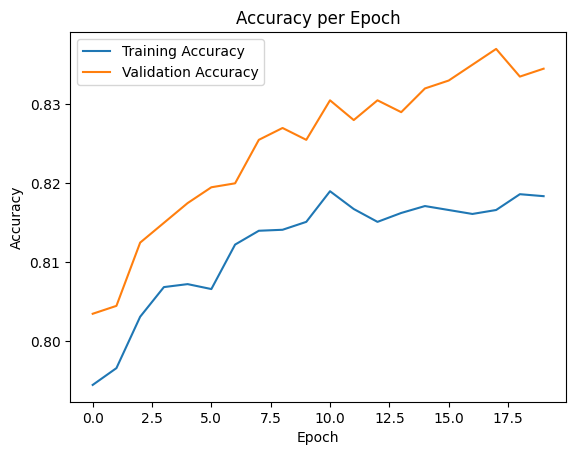

In [21]:
# Accuracy per epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # Convert probabilities to binary predictions

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [24]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1586   21]
 [ 310   83]]


In [26]:
acc = accuracy_score(y_test, y_pred)
print("Final Accuracy: {:.2f}%".format(acc * 100))

Final Accuracy: 83.45%
